In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

<h1>Loading and exploration of the dataset</h1>

In [169]:
df = pd.read_csv("data.csv")

In [170]:
df["tag_professor"]

0        Hilarious (2)  GROUP PROJECTS (2)  Gives good ...
1        Hilarious (2)  GROUP PROJECTS (2)  Gives good ...
2        Hilarious (2)  GROUP PROJECTS (2)  Gives good ...
3        Hilarious (2)  GROUP PROJECTS (2)  Gives good ...
4        Hilarious (2)  GROUP PROJECTS (2)  Gives good ...
                               ...                        
19995    BEWARE OF POP QUIZZES (4)  Amazing lectures (3...
19996    BEWARE OF POP QUIZZES (4)  Amazing lectures (3...
19997    BEWARE OF POP QUIZZES (4)  Amazing lectures (3...
19998    BEWARE OF POP QUIZZES (4)  Amazing lectures (3...
19999    BEWARE OF POP QUIZZES (4)  Amazing lectures (3...
Name: tag_professor, Length: 20000, dtype: object

In [171]:
df.shape #This gives the number of records (20,000) and the  number of features per record (51)

(20000, 51)

In [172]:
df.describe(include="all") #Some basic statistics about the data.

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
count,20000,20000,20000,20000,20000,20000.00000,20000.000000,2998,20000.000000,11093,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,1413,554,101,417,57,NaN,NaN,43,NaN,591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alan Bell,Volunteer State Community College,English department,Gallatin,CA,NaN,NaN,100%,NaN,Tough Grader (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,860,2262,860,2334,NaN,NaN,695,NaN,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.82350,3.643825,NaN,2.956345,NaN,...,0.201350,0.134250,0.217750,0.116150,0.102800,0.080700,0.098350,0.076750,0.067900,0.020100
std,NaN,NaN,NaN,NaN,NaN,3.91505,0.836048,NaN,0.776795,NaN,...,0.401019,0.340929,0.412727,0.320413,0.303705,0.272381,0.297795,0.266201,0.251581,0.140346
min,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,NaN,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,4.00000,3.000000,NaN,2.400000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,8.00000,3.700000,NaN,3.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,11.00000,4.300000,NaN,3.500000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [173]:
df.isnull().sum() #How many null elements there are by attribute

professor_name                  0
school_name                     0
department_name                 0
local_name                      0
state_name                      0
year_since_first_review         0
star_rating                     0
take_again                  17002
diff_index                      0
tag_professor                8907
num_student                     0
post_date                       5
name_onlines                    0
name_not_onlines                5
student_star                    5
student_difficult               5
attence                     15991
for_credits                 15947
would_take_agains           17418
grades                      16708
help_useful                     0
help_not_useful                 0
comments                        7
word_comment                    7
gender                          0
race                            0
asian                           0
hispanic                        0
nh_black                        0
nh_white      

<h1>Preprocessing</h1>

In [174]:
df2 = df[df["tag_professor"].notnull()] #We remove the records which don't have any tags
df2.shape #This will show how many records are remaining after dropping the nulls (11093). There are still 51 features for now

(11093, 51)

In [175]:
#Drop all columns except for the professor name, the star rating, and the binary tag attributes
df3 = df2.drop(["school_name","department_name",
          "local_name","state_name","take_again",
          "post_date","name_onlines","name_not_onlines", 
          "student_star","student_difficult","help_useful", "help_not_useful",
          "attence","for_credits","would_take_agains",
         "grades", "comments","race","gender","asian","hispanic","nh_black","nh_white",
         "year_since_first_review","diff_index","tag_professor","num_student","help_useful","help_not_useful","word_comment"],axis=1)
df3.shape #We are now down to 23 features. The professor name, the star rating, and the 21 binary tag attributes

(11093, 23)

In [176]:
df4 = df3.groupby(df3["professor_name"]).mean() #This will get the star rating and tags grouped by professor.

df4.shape #This gives the number of records after the groupby, where now each record corresponds to a single professor. There are now 626 records with 22 features (star rating & 21 tags)

(626, 22)

In [177]:
y = df4["star_rating"].to_numpy() #This will get our targets for regression as a numpy array
x = df4.drop(["star_rating"],axis=1) #This will remove the column we are targetting so that we can perform regression just on the tag

In [178]:
mms = MinMaxScaler() 
yn = mms.fit_transform(y.reshape((-1,1))) #This will scale the star ratings from [0,1]

In [179]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x.to_numpy(),yn,test_size=0.1,random_state=0) #Splits the dataset into training and testing. The random state is set as a constant for consistent results when grading, but this can be

In [180]:
#Reshapes the regression targets to (n_samples,n_features) which is the required format for sklearn
ytrain2 = ytrain2.ravel() 
ytest2 = ytest2.ravel()

<h1> Regression </h1>

<h2>1. Linear Regression </h2>

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
linearreg = LinearRegression().fit(xtrain2,ytrain2) #Create and fit linear regression model

In [183]:
linearregpreds = linearreg.predict(xtest2) #Gets the predictions on the testing set using the trained model

In [184]:
lrmae = metrics.mean_absolute_error(ytest2, linearregpreds)
lrmse =  metrics.mean_squared_error(ytest2, linearregpreds)
lrrmse = np.sqrt(metrics.mean_squared_error(ytest2, linearregpreds))
print('Mean Absolute Error:', lrmae)
print('Mean Squared Error:', lrmse)
print('Root Mean Squared Error:', lrrmse)

Mean Absolute Error: 0.15203139911464042
Mean Squared Error: 0.03915207042158926
Root Mean Squared Error: 0.19786882124677768


<h2>2. K-Nearest Neighbors Regression</h2>

In [185]:
from sklearn.neighbors import KNeighborsRegressor

In [186]:
knnreg = KNeighborsRegressor(n_neighbors=50).fit(xtrain2,ytrain2) #Create and fit linear regression model

In [187]:
knnregpreds = knnreg.predict(xtest2) #Gets the predictions on the testing set using the trained model

In [188]:
knnmae = metrics.mean_absolute_error(ytest2, knnregpreds)
knnmse =  metrics.mean_squared_error(ytest2, knnregpreds)
knnrmse = np.sqrt(metrics.mean_squared_error(ytest2, knnregpreds))
print('Mean Absolute Error:', knnmae)
print('Mean Squared Error:', knnmse)
print('Root Mean Squared Error:', knnrmse)

Mean Absolute Error: 0.1591836734693877
Mean Squared Error: 0.03960013994169095
Root Mean Squared Error: 0.19899783903774168


<h2>3. Support Vector Machine Regression</h2>

In [189]:
from sklearn.svm import SVR

In [190]:
svmreg = SVR(kernel='linear').fit(xtrain2,ytrain2) #Create and fit svm regression model

In [191]:
svmregpreds = svmreg.predict(xtest2) #Gets the predictions on the testing set using the trained model

In [192]:
svmmae = metrics.mean_absolute_error(ytest2, svmregpreds)
svmmse =  metrics.mean_squared_error(ytest2, svmregpreds)
svmrmse = np.sqrt(metrics.mean_squared_error(ytest2, svmregpreds))
print('Mean Absolute Error:', svmmae)
print('Mean Squared Error:', svmmse)
print('Root Mean Squared Error:', svmrmse)

Mean Absolute Error: 0.15288400975478098
Mean Squared Error: 0.039281963121801815
Root Mean Squared Error: 0.19819677878765288


<h2>4. Decision Tree Regression</h2>

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
dtreg =  DecisionTreeRegressor().fit(xtrain2,ytrain2) #Create and fit decision tree regression model

In [195]:
dtregpreds = dtreg.predict(xtest2) #Gets the predictions on the testing set using the trained model

In [196]:
dtmae = metrics.mean_absolute_error(ytest2, dtregpreds)
dtmse =  metrics.mean_squared_error(ytest2, dtregpreds)
dtrmse = np.sqrt(metrics.mean_squared_error(ytest2, dtregpreds))
print('Mean Absolute Error:', dtmae)
print('Mean Squared Error:', dtmse)
print('Root Mean Squared Error:', dtrmse)

Mean Absolute Error: 0.26288737717309135
Mean Squared Error: 0.09941187056833313
Root Mean Squared Error: 0.315296480424906


<h2>5. Random Forest Regression</h2>

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
rfreg = RandomForestRegressor(max_depth=2, random_state=0).fit(xtrain2,ytrain2) #Create and fit linear regression model

In [199]:
rfregpreds = rfreg.predict(xtest2) #Gets the predictions on the testing set using the trained model

In [200]:
rfmae = metrics.mean_absolute_error(ytest2, rfregpreds)
rfmse =  metrics.mean_squared_error(ytest2, rfregpreds)
rfrmse = np.sqrt(metrics.mean_squared_error(ytest2, rfregpreds))
print('Mean Absolute Error:', rfmae)
print('Mean Squared Error:', rfmse)
print('Root Mean Squared Error:', rfrmse)

Mean Absolute Error: 0.17211304354414664
Mean Squared Error: 0.047118237824499164
Root Mean Squared Error: 0.21706735780512731


<h2>6. Multi-layer Perceptron Regression</h2>

In [201]:
from sklearn.neural_network import MLPRegressor

In [202]:
mlpreg = MLPRegressor(max_iter=1000).fit(xtrain2,ytrain2) #Create and fit multi-layer perceptron regression model

In [203]:
mlpregpreds = mlpreg.predict(xtest2) #Gets the predictions on the testing set using the trained model

In [204]:
mlpmae = metrics.mean_absolute_error(ytest2, mlpregpreds)
mlpmse =  metrics.mean_squared_error(ytest2, mlpregpreds)
mlprmse = np.sqrt(metrics.mean_squared_error(ytest2, mlpregpreds))
print('Mean Absolute Error:', mlpmae)
print('Mean Squared Error:', mlpmse)
print('Root Mean Squared Error:', mlprmse)

Mean Absolute Error: 0.1654518733185543
Mean Squared Error: 0.04697668463356341
Root Mean Squared Error: 0.21674105433342206


<h1>Plots</h1>

In [209]:
import matplotlib.pyplot as plt

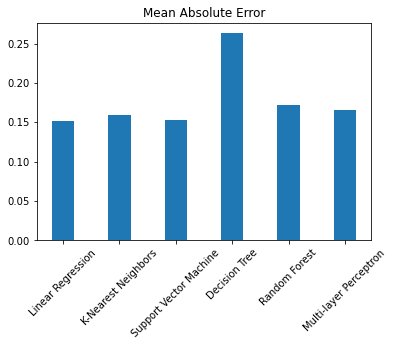

In [210]:
plt.bar(np.arange(0,12,2),[lrmae,knnmae,svmmae,dtmae,rfmae,mlpmae],tick_label=["Linear Regression", "K-Nearest Neighbors","Support Vector Machine", "Decision Tree","Random Forest","Multi-layer Perceptron"])
plt.plot()
plt.title("Mean Absolute Error")
plt.xticks(rotation=45)
plt.show()

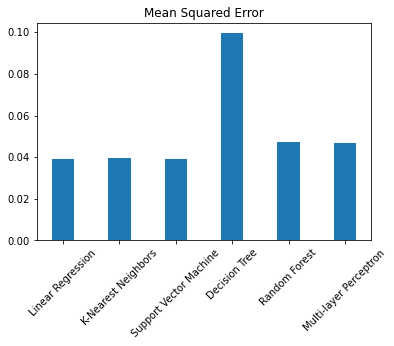

In [211]:
plt.bar(np.arange(0,12,2),[lrmse,knnmse,svmmse,dtmse,rfmse,mlpmse],tick_label=["Linear Regression", "K-Nearest Neighbors","Support Vector Machine", "Decision Tree","Random Forest","Multi-layer Perceptron"])
plt.plot()
plt.title("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

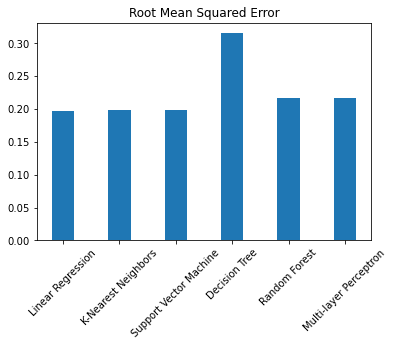

In [213]:
plt.bar(np.arange(0,12,2),[lrrmse,knnrmse,svmrmse,dtrmse,rfrmse,mlprmse],tick_label=["Linear Regression", "K-Nearest Neighbors","Support Vector Machine", "Decision Tree","Random Forest","Multi-layer Perceptron"])
plt.plot()
plt.title("Root Mean Squared Error")
plt.xticks(rotation=45)
plt.show()